In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ningom","key":"53b8540e06ccbede8759befaff246b35"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
# download API key from google drive
## Original: https://colab.research.google.com/drive/1eufc8aNCdjHbrBhuy7M7X6BGyzAyRbrF#scrollTo=y5_288BYp6H1
## When you run for the first time, you will see a link to authenticate.

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [7]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 5.03MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 53.0MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.9MB/s]


In [0]:
#get datas
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [0]:
test_df.isnull().sum()
train_df["FamilySize"]=train_df["SibSp"]+train_df["Parch"]+1

([array([374.,  72.,  43.,   8.,  12.,  19.,   8.,   6.,   0.,   7.]),
  array([537., 161., 102.,  29.,  15.,  22.,  12.,   6.,   0.,   7.])],
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 2 Lists of Patches objects>)

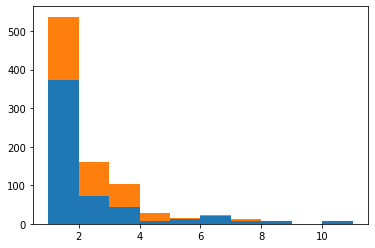

In [41]:
import matplotlib.pyplot as plt
split_data = []
for survived in [0,1]:
    split_data.append(train_df[train_df.Survived==survived])
temp = [i["FamilySize"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked")


([array([270., 105.,  80.,  32.,  12.,  12.,  10.,  11.,   3.,   0.,   3.,
           1.,   0.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
           1.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]),
  array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
           7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
           4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   3.])],
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 2

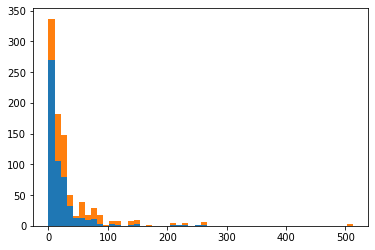

In [47]:
temp = [i["Fare"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked",bins=50)

In [45]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [0]:
#Null数提示
#train_df.isnull().sum()

#age,embarked穴埋め
train_df["Age"].fillna(train_df["Age"].median(),inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace=True)
test_df["Age"].fillna(test_df["Age"].median(),inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0],inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)
#test_PassengerIdの格納 
test_PassengerId=test_df.PassengerId.values
drop_column = ['PassengerId']
train_df.drop(drop_column,axis=1,inplace=True)
test_df.drop(drop_column,axis=1,inplace=True)

([array([ 80.,  97., 372.]), array([216., 184., 491.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

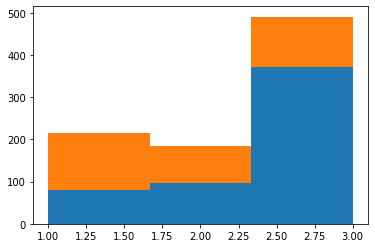

In [25]:
import matplotlib.pyplot as plt
split_data = []
for survived in [0,1]:
    split_data.append(train_df[train_df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

([array([ 13.,  13.,   8.,  63.,  80., 191.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([ 44.,  20.,  19.,  96., 122., 285.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

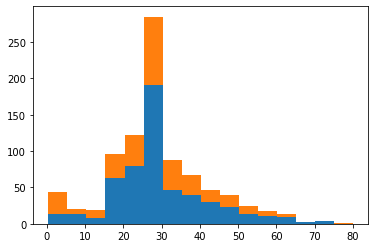

In [27]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [0]:
#家族系データセット 
train_df["FamilySize"]=train_df["SibSp"]+train_df["Parch"]+1
test_df["FamilySize"]=test_df["SibSp"]+test_df["Parch"]+1
train_df['IsAlone'] = 1 
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0
test_df['IsAlone'] = 1 
test_df['IsAlone'].loc[test_df['FamilySize'] > 1] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#名前の改変
train_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test_df['Title'] = test_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [0]:
#Fareの4分割
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4)
#Ageの5分割
train_df['AgeBin'] = pd.cut(train_df['Age'].astype(int), 5)
test_df['AgeBin'] = pd.cut(test_df['Age'].astype(int), 5)

In [0]:
#文字列の数値化 (離散値)
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
train_df['Sex_Code'] = label.fit_transform(train_df['Sex'])
train_df['Embarked_Code'] = label.fit_transform(train_df['Embarked'])
train_df['Title_Code'] = label.fit_transform(train_df['Title'])
train_df['AgeBin_Code'] = label.fit_transform(train_df['AgeBin'])
train_df['FareBin_Code'] = label.fit_transform(train_df['FareBin'])
test_df['Sex_Code'] = label.fit_transform(test_df['Sex'])
test_df['Embarked_Code'] = label.fit_transform(test_df['Embarked'])
test_df['Title_Code'] = label.fit_transform(test_df['Title'])
test_df['AgeBin_Code'] = label.fit_transform(test_df['AgeBin'])
test_df['FareBin_Code'] = label.fit_transform(test_df['FareBin'])
#目標 
Target = ['Survived']
#データのラベル
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data1_xy =  Target + data1_x

data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
#get_dummysは値をone-hotにしてくれる
data1_dummy = pd.get_dummies(train_df[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy

In [0]:
#データの分割
from sklearn.model_selection import train_test_split
train1_x, test1_x, train1_y, test1_y = train_test_split(train_df[data1_x_calc], train_df[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = train_test_split(train_df[data1_x_bin], train_df[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(data1_dummy[data1_x_dummy], train_df[Target], random_state = 0)

In [0]:
train_df[data1_x_bin]

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
0,1,3,2,11,2,1,0
1,0,1,0,12,2,2,3
2,0,3,2,8,1,1,1
3,0,1,2,12,2,2,3
4,1,3,2,11,1,2,1
...,...,...,...,...,...,...,...
886,1,2,2,14,1,1,1
887,0,1,2,8,1,1,2
888,0,3,2,8,4,1,2
889,1,1,0,11,1,1,2


In [0]:
#モデル選定の前に本当は統計学的解析が必要
!pip install xgboost
from xgboost import XGBClassifier
from sklearn import ensemble,gaussian_process,linear_model,naive_bayes,neighbors,svm,tree,discriminant_analysis
from sklearn.model_selection import cross_validate,ShuffleSplit
#モデルの選定
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = train_df[Target]
row_index = 0

for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = cross_validate(alg, train_df[data1_x_bin], train_df[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean() 
    #stdは標準偏差  
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   
    
    alg.fit(train_df[data1_x_bin], train_df[Target])
    MLA_predict[MLA_name] = alg.predict(train_df[data1_x_bin])
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.829851,0.0508559,0.032573
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.825746,0.0711592,0.160005
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.821642,0.0630851,0.0223761
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.821269,0.0659308,0.122785
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.820149,0.0524569,0.0810223
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.816045,0.0667994,0.00343139
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.815672,0.0777482,0.00383539
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.814179,0.0673133,0.00311923
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.810821,0.0495707,0.0459151
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.808209,0.0527903,0.00309999


In [0]:
#ランダムでの予測
import random
from sklearn import metrics
for index, row in train_df.iterrows(): 
    if random.random() > .5:  
        train_df.set_value(index, 'Random_Predict', 1)
    else: 
        train_df.set_value(index, 'Random_Predict', 0)

train_df['Random_Score'] = 0
train_df.loc[(train_df['Survived'] == train_df['Random_Predict']), 'Random_Score'] = 1 
print('Coin Flip Model Accuracy: {:.2f}%'.format(train_df['Random_Score'].mean()*100))

print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(train_df['Survived'], train_df['Random_Predict'])*100))

Coin Flip Model Accuracy: 50.51%
Coin Flip Model Accuracy w/SciKit: 50.51%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [0]:
#生存率の可視化
#性別,乗船地,お金での生存の確率を計算する
pivot_female = train_df[train_df.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

pivot_male = train_df[train_df.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)


Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN


In [0]:
#上のデータをもとに
#実際にデータを分類してみる
def mytree(df):
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] 
    for index, row in df.iterrows():
        Model.loc[index, 'Predict'] = 0
        if (df.loc[index, 'Sex'] == 'female'):
          Model.loc[index, 'Predict'] = 1
        if ((df.loc[index, 'Sex'] == 'female') & (df.loc[index, 'Pclass'] == 3) & (df.loc[index, 'Embarked'] == 'S')  &(df.loc[index, 'Fare'] > 8)):
          Model.loc[index, 'Predict'] = 0
        if ((df.loc[index, 'Sex'] == 'male') &(df.loc[index, 'Title'] in male_title)):
          Model.loc[index, 'Predict'] = 1       
    return Model

Tree_Predict = mytree(train_df)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(train_df['Survived'], Tree_Predict)*100))

Decision Tree Model Accuracy/Precision Score: 82.04%

